# Can we detect Luhman 16 in the Harvard Plate Archive?

The RA/Dec range is already available in [DASCH](http://dasch.rc.fas.harvard.edu/lightcurve.php).

In [1]:
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS

In [3]:
import glob

In [4]:
distance = 1.0/0.50114 * u.pc

In [35]:
c_TESS = SkyCoord(ra=162.303282427*u.degree, 
             dec=-53.317573814*u.degree, 
             distance=distance, 
             pm_ra_cosdec=-2763*u.mas/u.yr,
             pm_dec=+358*u.mas/u.yr, 
             radial_velocity=20.0*u.km/u.s,
             frame='icrs',
             obstime=Time('2019.26', format='decimalyear')
            )

In [47]:
coord_1935 = c_TESS.apply_space_motion(new_obstime=Time('2017.1', format='decimalyear'))

In [48]:
coord_1935.to_string(style='hmsdms')

'10h49m13.4534s -53d19m04.0384s'

In [6]:
fns = glob.glob('../data/DASCH/plates/*.fit')

In [7]:
len(fns)

34

In [25]:
def read_dasch(filename):
    '''Return a wcs and data given a DASCH fit filename'''
    hdus = fits.open(filename)

    hdr = hdus[0].header

    keys = list(hdr.keys())
    keys_subset1 = [key for key in keys if (key[0:2] != 'PV') ]
    pv_keys = list(set(keys) - set(keys_subset1))
    unreadable_keys = [key for key in pv_keys if int(key[4:])>4]

    for key in unreadable_keys:
        del hdr[key]

    wcs = WCS(hdr)
    data = hdus[0].data
    return wcs, data

In [33]:
wcs2, data2 = read_dasch(fns[-20])

''

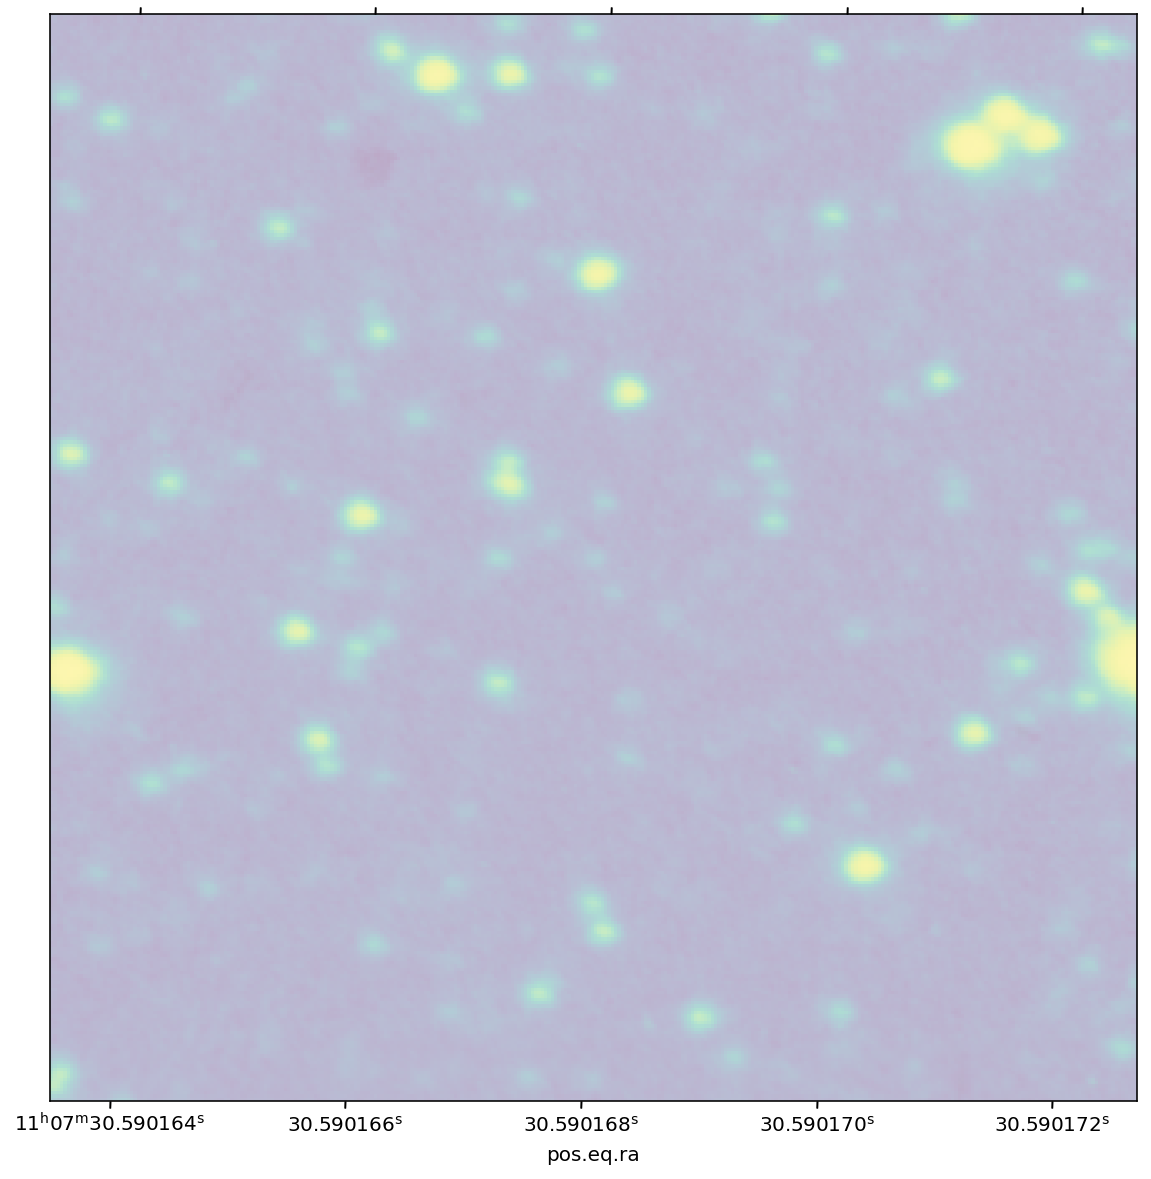

In [34]:
plt.figure(figsize=(10,10))
ax = plt.subplot(projection=wcs, label='DASCH')
ax.imshow(data, alpha=0.2)
ax.imshow(data2, alpha=0.2)
;

In [16]:
import astropy

In [17]:
astropy.__version__

'4.2'